<a href="https://colab.research.google.com/github/matheusBernal/Image-dimensionality-reduction/blob/main/Image_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files


In [13]:
class ImageProcessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.img = self._load_image(image_path)
        self.img_normalized = None
        self.img_gray = None
        self.img_bw = None

    def _load_image(self, image_path):
        img = mpimg.imread(image_path)
        return img

    def normalize_image(self):
        if self.img.max() > 1:
            self.img_normalized = self.img / 255.0
        else:
            self.img_normalized = self.img
        self.img_normalized = self.img_normalized.astype(np.float32)

    def to_grayscale(self):
        self.img_gray = np.dot(self.img_normalized[..., :3], [0.2989, 0.5870, 0.1140])
        return self.img_gray

    def to_black_and_white(self, threshold=0.5):
        self.img_bw = (self.img_gray > threshold).astype(float)
        return self.img_bw

    def show_image(self, img, title="Imagem"):
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()

    def process_image(self, threshold=0.5):
        self.normalize_image()
        self.to_grayscale()
        self.to_black_and_white(threshold)


        self.show_image(self.img, "Original Image")
        self.show_image(self.img_gray, "Gray Image")
        self.show_image(self.img_bw, "Black and white Image")

Saving Aragorn.jpg to Aragorn (1).jpg


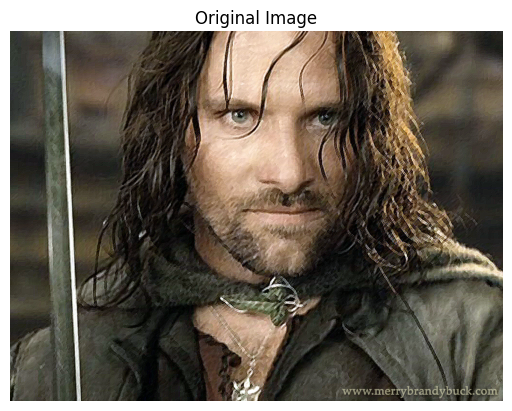

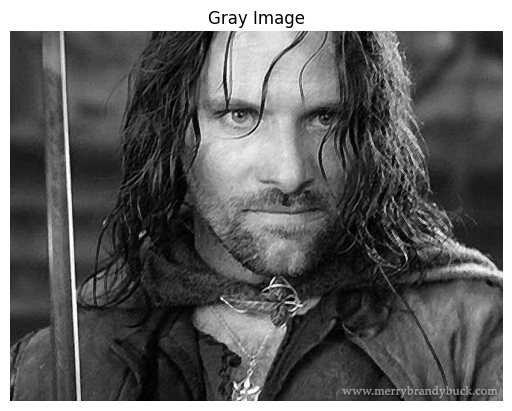

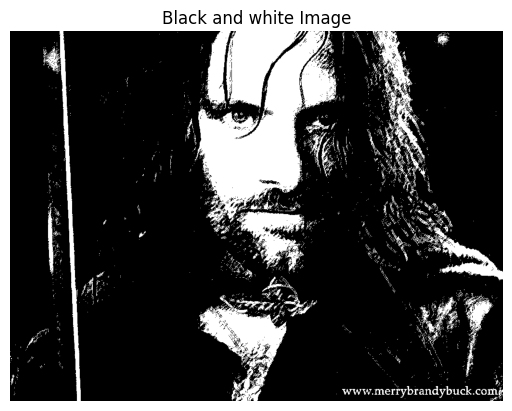

In [14]:
files.upload()
image_path = '/content/Aragorn.jpg'

image_processor = ImageProcessor(image_path)

image_processor.process_image(threshold=0.5)